In [285]:
import pandas as pd
import numpy as np
stock_data = pd.read_excel('input.xls')
data = stock_data.copy()

In [286]:
data['Deal_amount'] = data['Deal_amount'].apply(pd.to_numeric, errors='coerce')
data['Lastend'] = data['Lastend'].apply(pd.to_numeric, errors='coerce')
data['Rise_Amount'] = data['Rise_Amount'].apply(pd.to_numeric, errors='coerce')
data['Percent'] = data['Percent'].apply(pd.to_numeric, errors='coerce')

data['dealpercount'] = data.Deal_amount/data.Deal_count
data['Delta_perday'] = data.Highest-data.Lowest
def risemap(x):
    isRise = 1 if x > 0 else 0
    return isRise
data['isRise'] = data['Percent'].map(risemap)

In [287]:
data['month'] = data['Date'].dt.to_period('M')
grouped = data.groupby(['month']).agg({'Percent':['mean','min','max'],'End':['mean','min','max'],'isRise':['sum','count'],'Rise_Amount':['mean','min','max'],'Start':['mean','min','max']}).reset_index()
grouped.index = grouped['month']
grouped.drop('month',axis = 1,inplace =True)
for i in list(grouped.columns):
    temp_df = grouped[i].to_dict() 
    col_name=i[0]+'_'+i[1]
    data['month_'+col_name] = data['month'].map(temp_df).astype('float64')

data['season'] = data['Date'].dt.to_period('Q')
grouped = data.groupby(['season']).agg({'Percent':['mean','min','max'],'End':['mean','min','max'],'isRise':['sum','count'],'Rise_Amount':['mean','min','max'],'Start':['mean','min','max']}).reset_index()
grouped.index = grouped['season']
grouped.drop('season',axis = 1,inplace =True)
for i in list(grouped.columns):
    temp_df = grouped[i].to_dict() 
    col_name=i[0]+'_'+i[1]
    data['season_'+col_name] = data['season'].map(temp_df).astype('float64')
    
data['year'] = data['Date'].dt.to_period('Y')
grouped = data.groupby(['year']).agg({'Percent':['mean','min','max'],'End':['mean','min','max'],'isRise':['sum','count'],'Rise_Amount':['mean','min','max'],'Start':['mean','min','max']}).reset_index()
grouped.index = grouped['year']
grouped.drop('year',axis = 1,inplace =True)
for i in list(grouped.columns):
    temp_df = grouped[i].to_dict() 
    col_name=i[0]+'_'+i[1]
    data['year_'+col_name] = data['year'].map(temp_df).astype('float64')
data['days']=data['Date']-pd.to_datetime('1990-12-19')
data

/Users/angeliaye/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Date,End,Highest,Lowest,Start,Lastend,Rise_Amount,Percent,Deal_count,Deal_amount,...,year_End_max,year_isRise_sum,year_isRise_count,year_Rise_Amount_mean,year_Rise_Amount_min,year_Rise_Amount_max,year_Start_mean,year_Start_min,year_Start_max,days
0,2020-12-25,3396.5626,3397.0066,3348.3453,3351.7901,3363.1133,33.4493,0.9946,294546895,3.590944e+11,...,3451.9384,128.0,239.0,1.449534,-229.9225,180.0681,3120.271677,2677.591,3453.5181,10964 days
1,2020-12-24,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,275044450,3.633211e+11,...,3451.9384,128.0,239.0,1.449534,-229.9225,180.0681,3120.271677,2677.591,3453.5181,10963 days
2,2020-12-23,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,299523527,4.132548e+11,...,3451.9384,128.0,239.0,1.449534,-229.9225,180.0681,3120.271677,2677.591,3453.5181,10962 days
3,2020-12-22,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,323037654,4.321996e+11,...,3451.9384,128.0,239.0,1.449534,-229.9225,180.0681,3120.271677,2677.591,3453.5181,10961 days
4,2020-12-21,3420.5693,3423.6088,3381.1158,3394.3945,3394.8960,25.6733,0.7562,283759794,3.838990e+11,...,3451.9384,128.0,239.0,1.449534,-229.9225,180.0681,3120.271677,2677.591,3453.5181,10960 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,1990-12-25,120.2500,120.2500,114.5500,120.0900,114.5500,5.7000,4.9760,15,6.000000e+03,...,127.6100,8.0,9.0,3.453750,0.0100,5.7000,116.285556,96.050,126.5600,6 days
7335,1990-12-24,114.5500,114.5500,109.1300,113.5700,109.1300,5.4200,4.9666,32,3.100000e+04,...,127.6100,8.0,9.0,3.453750,0.0100,5.7000,116.285556,96.050,126.5600,5 days
7336,1990-12-21,109.1300,109.1300,103.7300,109.0700,104.3900,4.7400,4.5407,28,1.600000e+04,...,127.6100,8.0,9.0,3.453750,0.0100,5.7000,116.285556,96.050,126.5600,2 days
7337,1990-12-20,104.3900,104.3900,99.9800,104.3000,99.9800,4.4100,4.4109,197,8.400000e+04,...,127.6100,8.0,9.0,3.453750,0.0100,5.7000,116.285556,96.050,126.5600,1 days


In [ ]:
def convert_types(df, print_info = True):
    original_memory = df.memory_usage().sum()
    # Iterate through each column
    for c in df:
        # Convert ids and booleans to integers
        # Booleans mapped to integers
        if list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
    new_memory = df.memory_usage().sum()
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
    return df

0.896124031007752


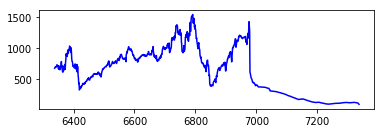

In [289]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(market_complex.End[-1000:],'b')
print(market_complex.query('isRise==0').isRise.count()/market_complex.query('isRise==1').isRise.count())

In [290]:
week_delta = []
week_delta_percent = []
for i in range(7339):
    if i < 7334:
        week_delta.append(data.iloc[i]['End'] - data.iloc[i+5]['End'])
        week_delta_percent.append((data.iloc[i]['End'] - data.iloc[i+5]['End'])/data.iloc[i+5]['End'])
    else:
        week_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
        week_delta_percent.append((data.iloc[i]['End'] - data.iloc[7338]['End'])/data.iloc[7338]['End'])
data['week_delta'] = week_delta
data['week_delta_percent'] = week_delta_percent

In [291]:
half_month_delta = []
for i in range(7339):
    if i < 7329:
        half_month_delta.append(data.iloc[i]['End'] - data.iloc[i+10]['End'])
    else:
        half_month_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
data['half_month_delta'] = half_month_delta

one_month_delta = []
one_month_delta_percent = []
for i in range(7339):
    if i < 7319:
        one_month_delta.append(data.iloc[i]['End'] - data.iloc[i+20]['End'])
        one_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[i+20]['End'])/data.iloc[i+20]['End'])
    else:
        one_month_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
        one_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[7338]['End'])/data.iloc[7338]['End'])
data['one_month_delta'] = one_month_delta
data['one_month_delta_percent'] = one_month_delta_percent

three_month_delta = []
three_month_delta_percent = []
for i in range(7339):
    if i < 7339-60:
        three_month_delta.append(data.iloc[i]['End'] - data.iloc[i+60]['End'])
        three_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[i+60]['End'])/data.iloc[i+60]['End'])
    else:
        three_month_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
        three_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[7338]['End'])/data.iloc[7338]['End'])
data['three_month_delta'] = three_month_delta
data['three_month_delta_percent'] = three_month_delta_percent

six_month_delta = []
six_month_delta_percent = []
for i in range(7339):
    if i < 7339-120:
        six_month_delta.append(data.iloc[i]['End'] - data.iloc[i+120]['End'])
        six_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[i+120]['End'])/data.iloc[i+120]['End'])
    else:
        six_month_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
        six_month_delta_percent.append((data.iloc[i]['End'] - data.iloc[7338]['End'])/data.iloc[7338]['End'])
data['six_month_delta'] = six_month_delta
data['six_month_delta_percent'] = six_month_delta_percent

one_year_delta = []
one_year_delta_percent = []
for i in range(7339):
    if i < 7339-240:
        one_year_delta.append(data.iloc[i]['End'] - data.iloc[i+240]['End'])
        one_year_delta_percent.append((data.iloc[i]['End'] - data.iloc[i+240]['End'])/data.iloc[i+240]['End'])
    else:
        one_year_delta.append(data.iloc[i]['End'] - data.iloc[7338]['End'])
        one_year_delta_percent.append((data.iloc[i]['End'] - data.iloc[7338]['End'])/data.iloc[7338]['End'])
data['one_year_delta'] = one_year_delta
data['one_year_delta_percent'] = one_year_delta_percent
data

,Date,End,Highest,Lowest,Start,Lastend,Rise_Amount,Percent,Deal_count,Deal_amount,...,week_delta_percent,half_month_delta,one_month_delta,one_month_delta_percent,three_month_delta,three_month_delta_percent,six_month_delta,six_month_delta_percent,one_year_delta,one_year_delta_percent
0,2020-12-25,3396.5626,3397.0066,3348.3453,3351.7901,3363.1133,33.4493,0.9946,294546895,3.590944e+11,...,0.000491,49.3716,-11.7445,-0.003446,173.3862,0.053794,305.9933,0.099009,356.5387,0.117282
1,2020-12-24,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,275044450,3.633211e+11,...,-0.012265,-10.1625,-6.6201,-0.001965,83.4028,0.025430,337.1323,0.111413,358.0778,0.119159
2,2020-12-23,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,299523527,4.132548e+11,...,0.004555,10.3555,19.9921,0.005946,108.0180,0.032990,397.6454,0.133229,374.9649,0.124683
3,2020-12-22,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,323037654,4.321996e+11,...,-0.003104,-53.3949,-46.0403,-0.013530,39.8471,0.012013,395.2658,0.133467,374.9017,0.125727
4,2020-12-21,3420.5693,3423.6088,3381.1158,3394.3945,3394.8960,25.6733,0.7562,283759794,3.838990e+11,...,0.015271,3.9656,6.0794,0.001780,82.4796,0.024709,441.0188,0.148015,437.8887,0.146810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7334,1990-12-25,120.2500,120.2500,114.5500,120.0900,114.5500,5.7000,4.9760,15,6.000000e+03,...,0.202741,20.2700,20.2700,0.202741,20.2700,0.202741,20.2700,0.202741,20.2700,0.202741
7335,1990-12-24,114.5500,114.5500,109.1300,113.5700,109.1300,5.4200,4.9666,32,3.100000e+04,...,0.145729,14.5700,14.5700,0.145729,14.5700,0.145729,14.5700,0.145729,14.5700,0.145729
7336,1990-12-21,109.1300,109.1300,103.7300,109.0700,104.3900,4.7400,4.5407,28,1.600000e+04,...,0.091518,9.1500,9.1500,0.091518,9.1500,0.091518,9.1500,0.091518,9.1500,0.091518
7337,1990-12-20,104.3900,104.3900,99.9800,104.3000,99.9800,4.4100,4.4109,197,8.400000e+04,...,0.044109,4.4100,4.4100,0.044109,4.4100,0.044109,4.4100,0.044109,4.4100,0.044109


In [18]:
for i in ['Lastend','Rise_Amount','Percent','Deal_amount','dealpercount']:
    mean_val = data[i].mean()
    data[i].fillna(mean_val,inplace=True)

In [293]:
market_features = ['End','Highest','Lowest','Start','Lastend','Percent','Rise_Amount','Deal_count','dealpercount']

# ML blending

In [397]:
ml_df  = data.copy().sort_values(by = 'Date')
#ml_df = pd.DataFrame(data=ml_data,index = data.Date)
for j in range(0,21):
    for i in range(len(market_features)):
        ml_df[market_features[i]+'_'+str(j+1)]= ml_df[market_features[i]].iloc[j+1:]

In [572]:
ml_df

,Date,End,Highest,Lowest,Start,Lastend,Rise_Amount,Percent,Deal_count,Deal_amount,...,Delta_perday_20,End_21,Highest_21,Lowest_21,Start_21,Lastend_21,Rise_Amount_21,Percent_21,dealpercount_21,Delta_perday_21
7338,1990-12-19,99.9800,99.9800,95.7900,96.0500,NaN,NaN,NaN,1260,4.940000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7337,1990-12-20,104.3900,104.3900,99.9800,104.3000,99.9800,4.4100,4.4109,197,8.400000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7336,1990-12-21,109.1300,109.1300,103.7300,109.0700,104.3900,4.7400,4.5407,28,1.600000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7335,1990-12-24,114.5500,114.5500,109.1300,113.5700,109.1300,5.4200,4.9666,32,3.100000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7334,1990-12-25,120.2500,120.2500,114.5500,120.0900,114.5500,5.7000,4.9760,15,6.000000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-21,3420.5693,3423.6088,3381.1158,3394.3945,3394.8960,25.6733,0.7562,283759794,3.838990e+11,...,42.4930,3420.5693,3423.6088,3381.1158,3394.3945,3394.8960,25.6733,0.7562,1352.901150,42.4930
3,2020-12-22,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,323037654,4.321996e+11,...,61.8957,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,1337.923153,61.8957
2,2020-12-23,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,299523527,4.132548e+11,...,34.0070,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,1379.707241,34.0070
1,2020-12-24,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,275044450,3.633211e+11,...,40.0531,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,1320.954283,40.0531


In [396]:
market_features = ['End','Highest','Lowest','Start','Lastend','Rise_Amount','Percent','Deal_count','dealpercount','Delta_perday']

In [413]:
features = [i for i in ml_df.columns if i not in ['Date','Percent','month', 'season', 'year', 'days','End','Lowest','Start','Lastend','Rise_Amount','Deal_count','Deal_amount','dealpercount','Highest','Delta_perday']]

new_df = ml_df.copy()
for i in ml_df.columns:
    if i in ['Date','month', 'season', 'year', 'days']:
        continue
    mean_val = new_df[i].mean()
    new_df[i].fillna(mean_val,inplace=True)

In [416]:
from sklearn import preprocessing
ml_data = preprocessing.scale(new_df[features],axis=0)
ml_x_train = ml_data[:pos]
ml_y_train = new_df['Percent'][:pos]
ml_x_test  = ml_data[pos:-1]
ml_y_test = new_df['Percent'][pos:-1]

In [644]:
from lightgbm import LGBMRegressor,LGBMClassifier

features = [i for i in ml_df.columns if i not in ['Date','Percent','month', 'season', 'year', 'days','End','Lowest','Start','Lastend','Rise_Amount','Deal_count','Deal_amount','dealpercount','Highest','Delta_perday']]
kf_model = LGBMRegressor(boosting_type = 'gbdt',objective = 'regression',
                         n_estimators=1000,max_depth=4, learning_rate=0.01, 
                         subsample=0.7,colsample_bytree=1, 
                         missing=-1, metric='rmse',silent = 1)
kf_model.fit(ml_x_train,ml_y_train,verbose=50)
evaluation(kf_model)

[LightGBM] [Warning] Unknown parameter: missing
[-0.11253447  1.70418655  0.60952065 ... -1.84201003  0.77596082
 -0.5658148 ]
The value of model is 0.9592320211759542
The mean squared error of model is 0.08849569040303133
The mean absoluate error of model is 0.0681586904837834
The value of default measurement of model is 0.9592320211759542


array([-0.11253447,  1.70418655,  0.60952065, ..., -1.84201003,
        0.77596082, -0.5658148 ])

In [ ]:
#DART N
mse = [0.05348428744613584,0.05014782665613658,0.083523582775845]
score = [0.975360988901347,0.9768980215208394,0.9615225595912471]


In [ ]:
#DART depth
mse = [0.0488608578258839,0.05014782665613658,0.044016951749753175]
score = [0.977490899182791,0.9768980215208394,0.9797223780202124]
#gbdt 
mse = [0.07806568415807966,0.08961364166441327,0.10979608618735018]
score  = [0.9640368910152916,0.9587170061154154,0.9494194067952526]

In [486]:
evaluation(kf_model)

[-0.15071352  1.68572737  0.61138867 ... -1.85931833  0.76394855
 -0.56958733]
The value of model is 0.9650682363753805
The mean squared error of model is 0.07582692662538575
The mean absoluate error of model is 0.05541748487890194
The value of default measurement of model is 0.9650682363753805


array([-0.15071352,  1.68572737,  0.61138867, ..., -1.85931833,
        0.76394855, -0.56958733])

In [544]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import stochastic_gradient
sgdc=stochastic_gradient.SGDRegressor(max_iter=10000)  # 初始化分类器
sgdc.fit(ml_x_train,ml_y_train)
evaluation(sgdc)

[-0.10874322  1.68325489  0.63619616 ... -1.8438075   0.77570254
 -0.55136984]
The value of model is 0.9996443782819252
The mean squared error of model is 0.0007719536354541586
The mean absoluate error of model is 0.022468946466934644
The value of default measurement of model is 0.9996443782819251


array([-0.10874322,  1.68325489,  0.63619616, ..., -1.8438075 ,
        0.77570254, -0.55136984])

In [532]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', degree=2, gamma='scale', coef0=0.0, tol=0.001,
        C=10, epsilon=0.1, shrinking=True, cache_size=200, verbose=True, max_iter=-1)
svr.fit(X= ml_x_train,y = ml_y_train)
y_predict = svr.predict(X = ml_x_test) 
print('The value of model is', r2_score(ml_y_test, y_predict))
# 使用mean_squared_error模块,并输出评估结果
print('The mean squared error of model is', mean_squared_error(ml_y_test, y_predict))
# 使用meam_absolute_error模块,并输出评估结果
print('The mean absoluate error of model is', mean_absolute_error(ml_y_test, y_predict))
# 使用模型自带的评估模块，并输出评估结果。
print('The value of default measurement of model is',svr.score(ml_x_test,ml_y_test))

[LibSVM]The value of model is 0.9957621288324656
The mean squared error of model is 0.009199213344097611
The mean absoluate error of model is 0.09588083885404955
The value of default measurement of model is 0.9957621288324656


AttributeError: 'SVR' object has no attribute 'feature_importance'

In [546]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
models = {'lightGBM':[],'SGD':[],'SVR':[]}
results = {'lightGBM':pd.DataFrame(),'SGD':pd.DataFrame(),'SVR':pd.DataFrame()}
for model_name in models: 
    for train_index, test_index in kf.split(ml_x_train,ml_y_train):
        if model_name == 'lightGBM':
            kf_model = LGBMRegressor(boosting_type = 'dart',objective = 'regression',metric='rmsle',n_estimators=1000,max_depth=6, learning_rate=0.1, subsample=0.9,colsample_bytree=0.8, missing=-1, eval_metric='auc',silent = 1)
            kf_model.fit(ml_x_train[train_index],ml_y_train.iloc[train_index])
            result = kf_model.predict(ml_x_train[test_index])
            blend1 = pd.DataFrame(data = {'Percent':result})
            results['lightGBM'] = pd.concat([results['lightGBM'],blend1['Percent']])
        elif model_name == 'SGD':
            print('SGD')
            kf_model = stochastic_gradient.SGDRegressor(max_iter=10000)
            kf_model.fit(ml_x_train[train_index],ml_y_train.iloc[train_index])
            result = kf_model.predict(ml_x_train[test_index])
            blend1 = pd.DataFrame(data = {'Percent':result})
            results['SGD'] = pd.concat([results['SGD'],blend1['Percent']])
        elif model_name == 'SVR':
            kf_model = SVR(kernel='linear', degree=5, gamma='auto', coef0=0.0, tol=0.001,C=10, epsilon=0.1, shrinking=True, cache_size=200, verbose=True, max_iter=-1)
            kf_model.fit(X = ml_x_train[train_index],y = ml_y_train.iloc[train_index])
            result = kf_model.predict(X = ml_x_train[test_index])
            blend1 = pd.DataFrame(data = {'Percent':result})
            results['SVR'] = pd.concat([results['SVR'],blend1['Percent']])
        models[model_name].append(kf_model)

[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: missing
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > n

In [430]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluation(model):
    y_predict = model.predict(ml_x_test)
    print(y_predict)
    print('The value of model is', r2_score(ml_y_test, y_predict))
    # 使用mean_squared_error模块,并输出评估结果
    print('The mean squared error of model is', mean_squared_error(ml_y_test, y_predict))
    # 使用meam_absolute_error模块,并输出评估结果
    print('The mean absoluate error of model is', mean_absolute_error(ml_y_test, y_predict))
    # 使用模型自带的评估模块，并输出评估结果。
    print('The value of default measurement of model is',model.score(ml_x_test,ml_y_test))
    return y_predict



In [623]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators=10000, random_state=0,max_depth=6)
lr.fit(np.array(a).reshape(5871,3),ml_y_train)
test_result = {'lightGBM':[0]*(len(ml_x_test)),'SGD':[0]*(len(ml_x_test)),'SVR':[0]*(len(ml_x_test))}
for model_name in models: 
    for model in models[model_name]:
        if model_name !='SVR':
            test_result[model_name] += 0.2*model.predict(ml_x_test)
        else:
            test_result[model_name] += 0.2*model.predict(X = ml_x_test)
    
output = lr.predict(np.array(a_).reshape(1467,3))

In [654]:
output = np.zeros(shape = [1467])
for key,value in test_result.items():
    print('Now testing:',key)
    i = value
    print('The value of model is', r2_score(ml_y_test, i))
    # 使用mean_squared_error模块,并输出评估结果
    print('The mean squared error of model is', mean_squared_error(ml_y_test,i))
    # 使用meam_absolute_error模块,并输出评估结果
    print('The mean absoluate error of model is', mean_absolute_error(ml_y_test, i))
    output+=np.array(value)/3

print('With stacking:')
print('The value of model is', r2_score(ml_y_test, output))
# 使用mean_squared_error模块,并输出评估结果
print('The mean squared error of model is', mean_squared_error(ml_y_test,output))
# 使用meam_absolute_error模块,并输出评估结果
print('The mean absoluate error of model is', mean_absolute_error(ml_y_test, output))


Now testing: lightGBM
The value of model is 0.9557954349011194
The mean squared error of model is 0.09595554207568054
The mean absoluate error of model is 0.09019834757720163
Now testing: SGD
The value of model is 0.9996789994491925
The mean squared error of model is 0.0006968009252082479
The mean absoluate error of model is 0.020201293067680585
Now testing: SVR
The value of model is 0.9967651641120161
The mean squared error of model is 0.007021908946802941
The mean absoluate error of model is 0.08372624115669682
With stacking:
The value of model is 0.9946017858682865
The mean squared error of model is 0.01171798799717815
The mean absoluate error of model is 0.05031591402446928


In [610]:
a = [[],[],[]]
a_ = [[],[],[]]
n = 0
for key,value in results.items():  
    
    for i in value.values:
        a[n].append(i[0])
    n += 1

n=0
for key,value in test_result.items():  
    a_[n].append(value)
    n += 1

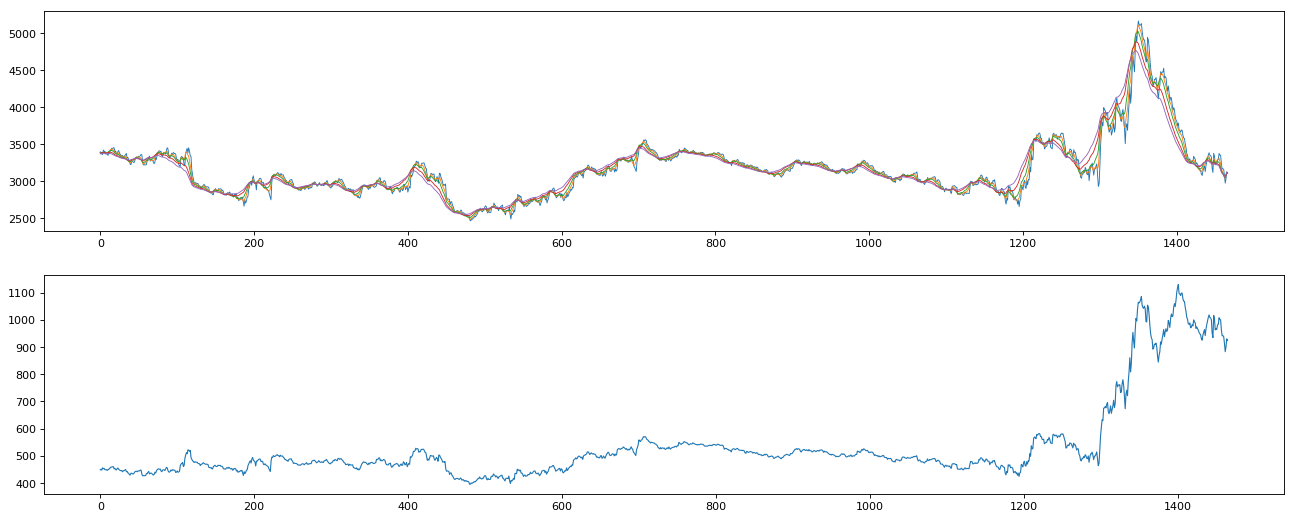

In [739]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,8), dpi=80)
axes[0].plot(data.sort_values(by='Date')[-1467:]['End'], label='daily', linewidth=0.8)
axes[0].plot(data.sort_values(by='Date')[-1467:]['End'].ewm(span=5).mean(), label='5mean', linewidth=0.8)
axes[0].plot(data.sort_values(by='Date')[-1467:]['End'].ewm(span=10).mean(), label='10mean', linewidth=0.8)
axes[0].plot(data.sort_values(by='Date')[-1467:]['End'].ewm(span=20).mean(), label='20mean', linewidth=0.8)
axes[0].plot(data.sort_values(by='Date')[-1467:]['End'].ewm(span=30).mean(), label='30mean', linewidth=0.8)

axes[1].plot(end_plt, label='预测值', linewidth=1)
#axes[1].legend(loc='best')

In [700]:
end_predict = []
currentend = data.iloc[pos-1].End
for i in range(pos,7338):
    index = i-5871
    print(1+a_[0][0][index]*0.01)
    currentend = currentend*(1 + a_[0][0][index]*0.01)
    end_predict.append(currentend)
    

0.9988876373129505
1.0167751947687405
1.0067614813248207
0.9689979525508826
0.9795753279339269
1.0342536240263946
1.027542291631861
1.0037621314783627
0.9996366019319451
1.0220899654800006
1.0394449600923545
1.0005573643713488
1.0068375539606242
0.9764153570805545
0.9975152878944111
0.9830272327941462
1.0019660075745456
0.9961698870591116
1.0425824101465442
1.0118997789134003
0.9201027727751415
1.0178517629179653
1.0515879823617913
1.0059719598484398
1.0025664374632663
1.008937186256767
0.991068685964967
0.9861616370018647
0.9872785552058716
0.9839548238015883
0.9746883903531869
1.023340036928701
0.9901039806871093
0.9880753372529507
0.9808005469177616
1.0061019007105285
1.0148095510467894
1.0047320401105693
1.0046386850758289
1.009131767033883
1.0053254707842822
1.007135359282931
0.9941640837710004
1.0211663074079453
1.003296990357143
1.0075777589202868
0.9779104739568563
1.0048076212450556
0.9902280268728901
0.9976945052144071
1.018650440354635
0.9950694724491987
1.001253835677637
1.

In [701]:
end_predict

[908.8818678652298,
 924.1285382204456,
 930.377016073357,
 901.5334236754826,
 883.1198991403066,
 913.3699561356863,
 938.5262578353555,
 942.0571170132279,
 941.714775276908,
 962.5172221547814,
 1000.4836755708807,
 1001.04130952576,
 1007.8859834964563,
 984.1153524721783,
 981.6701091425948,
 965.0084509071725,
 966.9056648311564,
 963.2023069316683,
 1004.2177826195301,
 1016.1677522136076,
 934.9787664164234,
 951.669785687821,
 1000.764509806134,
 1006.7410352764398,
 1009.3247731851808,
 1018.345296676706,
 1009.2501350359875,
 995.2837653114424,
 982.6223178365407,
 966.8559696103616,
 942.3832887228931,
 964.378549482676,
 954.8350407320579,
 943.448954892263,
 925.3352509473223,
 930.9815547725548,
 944.7689736315783,
 949.2396583100243,
 953.6428821464119,
 962.3513267796937,
 967.4763006546742,
 974.3795916575664,
 968.693193985406,
 989.1968519132855,
 992.4582243953597,
 999.9788335582837,
 977.8897750718055,
 982.5910987297634,
 972.9892449180388,
 970.7460232874423,


In [703]:
end_plt = []
for i in range(len(end_predict)-1,0,-1):
    end_plt.append(end_predict[i])
end_plt

[448.4837457553383,
 451.0659632511523,
 447.7212988856849,
 456.19317733171636,
 452.81385262166475,
 454.1523396287787,
 449.1064006506353,
 449.1600517636988,
 449.40163906912954,
 446.5134183834796,
 449.95217987847076,
 449.7202883557951,
 454.77443405748596,
 455.6323989674202,
 459.29972812627716,
 458.95830758795785,
 459.93216266241535,
 460.24613760705387,
 452.2872486367234,
 454.4938965051928,
 449.38625332369435,
 448.4054820981652,
 453.7102463291267,
 455.2619486792173,
 450.3583148204507,
 448.42777273796634,
 446.3293141181941,
 445.34974192415797,
 446.2947212368988,
 441.42285960029983,
 445.1877865367652,
 445.64188325244874,
 448.0242292661611,
 449.83384291130153,
 441.6219610966859,
 442.67912529512483,
 437.06130535236764,
 436.20432014830044,
 430.1056929050518,
 430.0124994247866,
 436.3534886581036,
 435.8762693041081,
 433.8943735675162,
 433.46063788345424,
 437.0029606787197,
 441.52972354732725,
 443.1862181117324,
 443.5702806585294,
 441.5083236365838,


In [724]:
pd.DataFrame(end_plt).to_csv('pre.csv')
data.iloc[pos:].End.to_csv('end.csv')